# AIRBNB-NYC DIVISION ANALYSIS AND VISUALIZATION

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [164]:
#pip install folium

In [88]:
file = pd.read_csv('AB_NYC_2019.csv')

In [89]:
file.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [90]:
len(file)

48895

In [91]:
file.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [92]:
file.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [93]:
# We then find the total and also sort it in descending.
total = file.isnull().sum().sort_values(ascending=False)
# We then calculate the percentage of the total of the null values.
percent = ((file.isnull().sum())*100)/file.isnull().count().sort_values(ascending=False)

In [94]:
missing_file = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
# We print the missing values.
missing_file.head()

,Total,Percent
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000


#### We noticed that there are 20% NaN values in last_review and reviews_per_month; host_name and name contains null values.
#### We need to fix these either by removing the columns or replacing the values.

In [95]:
# We investigate the last_review.
file.last_review.head()

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

#### last_review is a date; name and host_name are also irrelevant to our analysis.
#### We get rid of last_review, name and host_name 

In [96]:
file.drop(['last_review', 'name','host_name'],axis=1,inplace=True) 
# NOTE: inplace=True -> Immediate update to our dataframe.

In [97]:
file.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [98]:
# It is essential to add 0 to empty spaces in reviews_per_month.
file.reviews_per_month.fillna(0, inplace=True)
# We then check for null values in reviews_per_month.
file.reviews_per_month.isnull().sum()

0

# We use correlation analysis on the dataset but before we remove id and host_id.


In [122]:
columns = ['id','host_id']
new_file = file.drop(axis=1,labels=columns)
new_file.corr().style.background_gradient(cmap="coolwarm")

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


#### We see the correlation between the number_of_reviews and reviews_per_month.

## Description of A Dataframe

In [100]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


#### Mean of price is around 150
#### Individual on Average spents 7 nights
#### Max hosting is 327

### We investigate the host listings on Airbnb and also show the Top ten host listings.

In [101]:
hosts = file.host_id.value_counts().head(10)
hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

#### Our top host has 327 host listings.

### We plot the top 10 hostings.

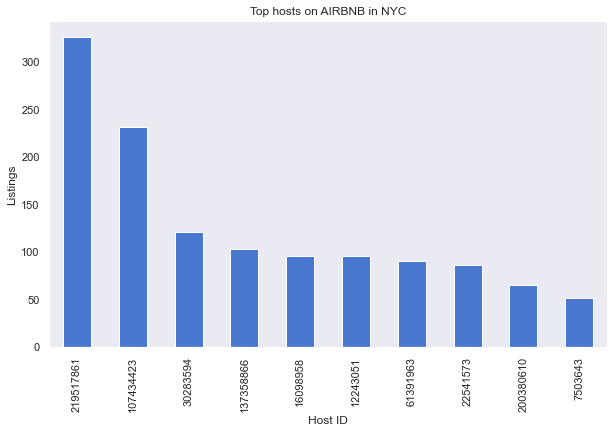

In [102]:
plt.figure(figsize=(10,6))
h = hosts.plot(kind = 'bar')
h.set_title('Top hosts on AIRBNB in NYC')
h.set_xlabel('Host ID')
h.set_ylabel('Listings');

### NYC Neighborhood Divisions

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


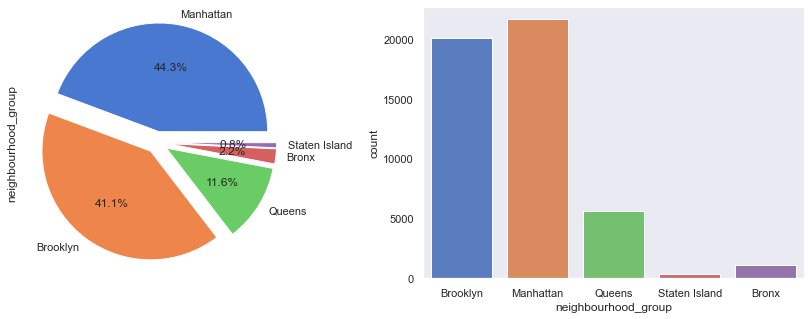

In [103]:
# We plot the divisions  into several visualizations.

f,ax = plt.subplots(1,2,figsize=(15,5))
df.neighbourhood_group.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0])
# NOTE: explode adds space between each pie wedge and autopct adds percentage value of each pie wedge.

## easy countplot or bar graph of neighbourhood_group
sns.countplot(file['neighbourhood_group'])

# Display the graph
plt.show();


#### Manhattan has more listings than any neighbourhood group.

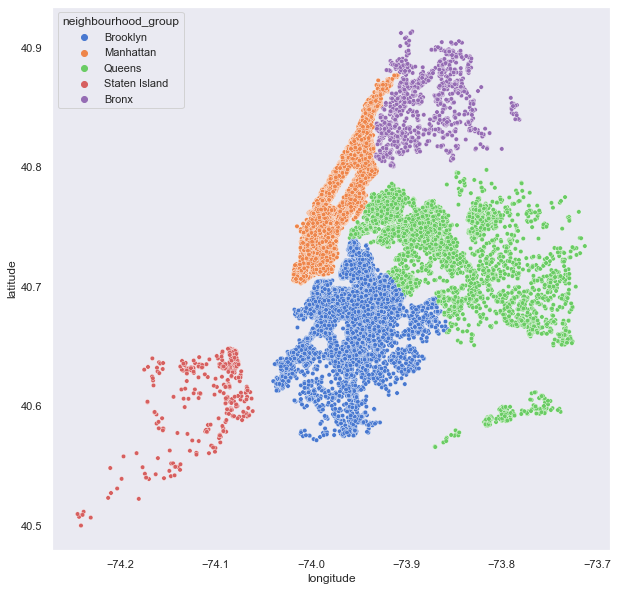

In [104]:
# We create the figure of size 10 Width and 10 Height.
plt.figure(figsize=(10,10))

# We plot a Scatterplot of different Neighbourhood Groups in NYC.
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=file, palette="muted");

# We can see different borough in NYC.

### Let's look at Price distribution for different boroughs



#### Price Distribution in Brooklyn

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


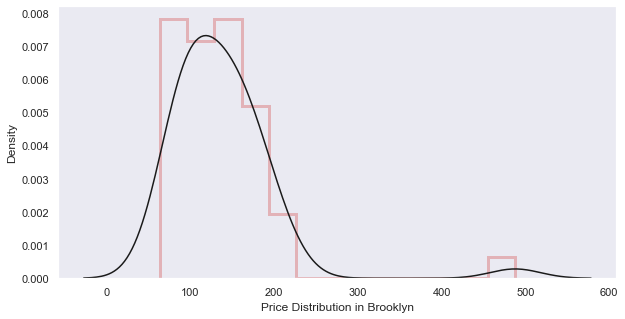

In [105]:
# Plot style
sns.set(style='dark',palette='muted',color_codes=True)

# We ignore -- f, axes = plt.subplots(3, 2, figsize=(10, 10), share x=True) -- ignore #

# We plot figure size with 10 width and 5 height.
plt.figure(figsize=(10, 5))

# We create dataframe "file1" with all the Neighbourhood of Brooklyn and their price.
file1 = file[file.neighbourhood_group == 'Brooklyn'][['neighbourhood','price']]
  
# We take mean of all the prices of neighbouhood.
 
d = file1.groupby('neighbourhood').mean()

sns.distplot(d,color='r',axlabel ="Price Distribution in Brooklyn",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.plot();

### Price distribution in Queens.

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


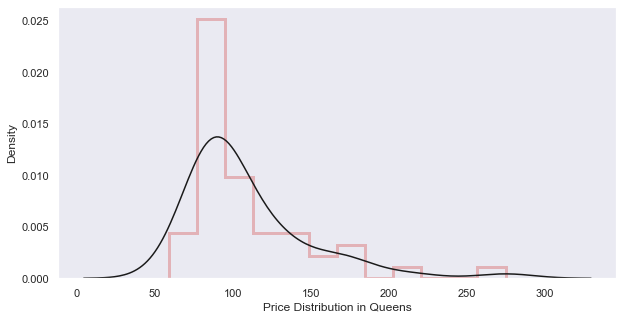

In [106]:
plt.figure(figsize=(10, 5))
file1 = file[file.neighbourhood_group == "Queens"][["neighbourhood","price"]]
d = file1.groupby("neighbourhood").mean()
sns.distplot(d,color='r',axlabel ="Price Distribution in Queens",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.plot();

#### Price in Manhattan

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


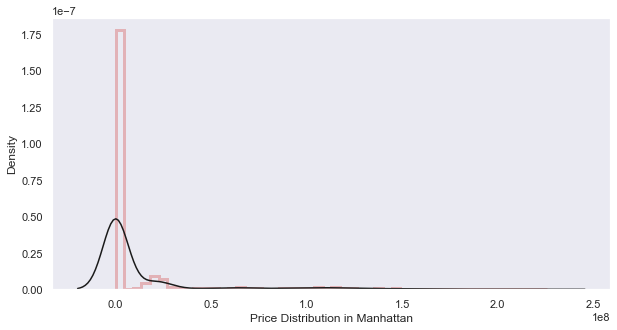

In [115]:
plt.figure(figsize=(10, 5))
file1 = file[file.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
d = file.groupby("neighbourhood").mean()
sns.distplot(d,color='r',axlabel ="Price Distribution in Manhattan",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.plot();

### Price distribution in Staten Island

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


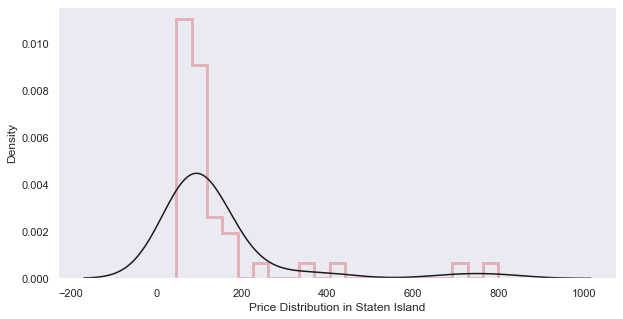

In [114]:
plt.figure(figsize=(10, 5))
file1 = file[file.neighbourhood_group == "Staten Island"][["neighbourhood","price"]]
d = file1.groupby("neighbourhood").mean()
sns.distplot(d,color='r',axlabel ="Price Distribution in Staten Island",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.plot();

### Price distribution in Bronx

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


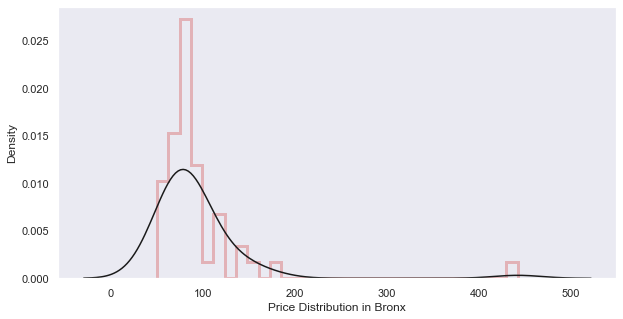

In [113]:
plt.figure(figsize=(10, 5))
file1 = file[file.neighbourhood_group == "Bronx"][["neighbourhood","price"]]
d = file1.groupby("neighbourhood").mean()
sns.distplot(d,color='r',axlabel ="Price Distribution in Bronx",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.plot();

### Distribution of Price in the Neighbourhood

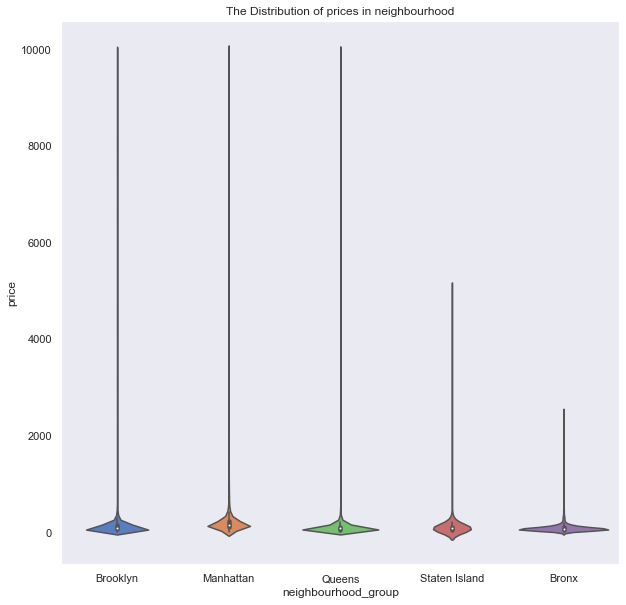

In [120]:
# Using violin plot.
plt.figure(figsize=(10,10))
file2=file[file.price<500]
pr=sns.violinplot(data=file, x='neighbourhood_group', y='price')
pr.set_title('The Distribution of prices in neighbourhood');

### We describe the price grouped by the Neighbourhood groups

In [121]:
file['price'].groupby(file['neighbourhood_group']).describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


# We also investigate the dataset through the room analysis.

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


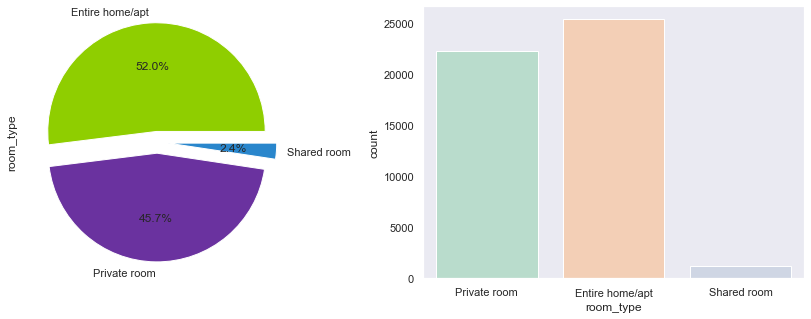

In [132]:
f,ax = plt.subplots(1,2,figsize=(15,5))
file.room_type.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],colors = ['#8fce00','#6a329f','#2986cc'])
ax = sns.countplot(file.room_type,palette="Pastel2")
plt.show();

### Price Distribution according to room types.

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


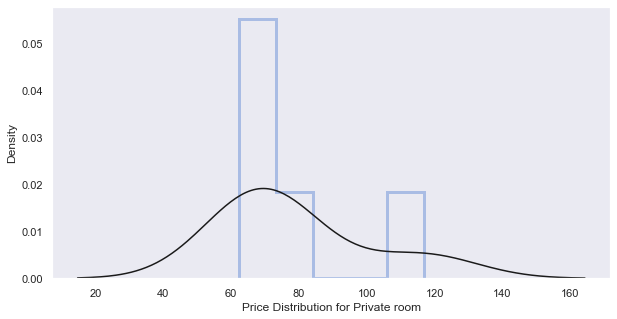

In [135]:
# Private Room
plt.figure(figsize=(10,5))
file1 = file[file.room_type == "Private room"][["neighbourhood_group","price"]]
file2 = file1.groupby("neighbourhood_group").mean()
sns.distplot(file2,color='b',axlabel ="Price Distribution for Private room",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.show();

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


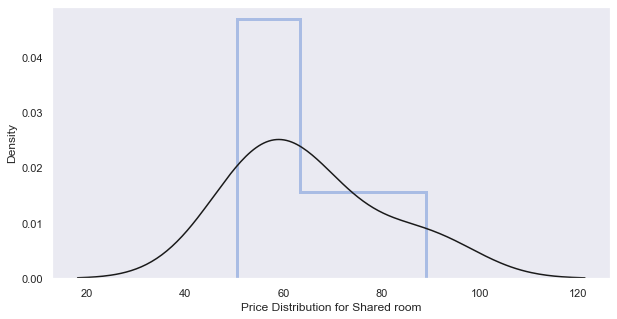

In [138]:
# Shared Room
plt.figure(figsize=(10,5))
file1 = file[file.room_type == "Shared room"][["neighbourhood_group","price"]]
file2 = file1.groupby("neighbourhood_group").mean()
sns.distplot(file2,color='b',axlabel ="Price Distribution for Shared room",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.show();

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


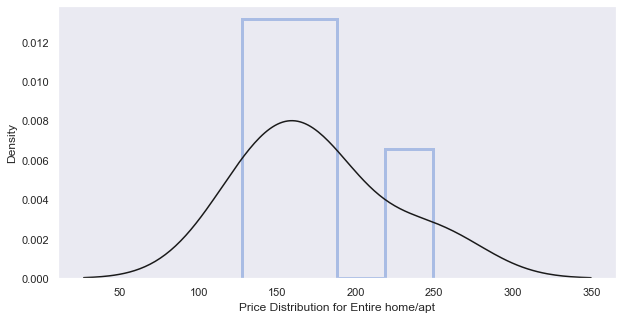

In [140]:
# Entire Home/Apt
plt.figure(figsize=(10,5))
file1 = file[file.room_type == "Entire home/apt"][["neighbourhood_group","price"]]
file2 = file1.groupby("neighbourhood_group").mean()
sns.distplot(file2,color='b',axlabel ="Price Distribution for Entire home/apt",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3})
plt.show();

#### Price distribution for different room types.

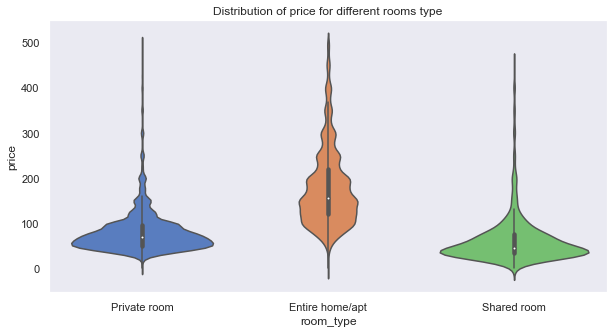

In [142]:
plt.figure(figsize=(10,5))
file = file[file.price<500]
pr=sns.violinplot(data=file, x='room_type', y='price')
pr.set_title('Distribution of price for different rooms type');

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


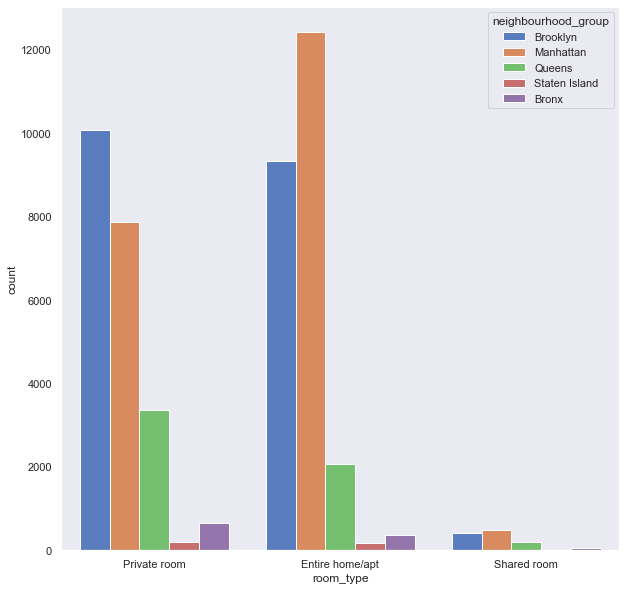

In [147]:
# Price distribution of rooms across the Neighbourhood group.
plt.figure(figsize=(10,10))
ax = sns.countplot(file['room_type'],hue=file['neighbourhood_group'], palette='muted');

In [148]:
file['price'].groupby(file['room_type']).describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,24359.0,177.663985,84.987163,0.0,119.0,155.0,219.0,499.0
Private room,22152.0,81.210681,48.711449,0.0,50.0,70.0,95.0,499.0
Shared room,1149.0,62.378590,53.036017,0.0,33.0,45.0,75.0,450.0


# In Conclusion, for regions:
# 1.Manhattan is the most expensive region, with 196.88 as a mean value
# 2. Bronx is the less expensive region, with US 87.50 as a mean value.

# As for room types:
# 1. Entire home/apt is the most expensive room type with 211.79.
# 2. Shared Room is the less expansive room type with 70.13.

# MAP VISUALIZATION

In [170]:
# We create a plot of 10 x 10
plt.figure(figsize=(10,10))

# We read the image.
nyc_img = plt.imread('/C/Users/Valentine Enedah/Desktop/GITHUB PROJECTS/AIR_BNB DATASET ANALYSIS AND VISUALIZATION/New_York_City_.png')

## zorder -> how close our objects to foreground
## eg - zorder = 0 -> closer to background ,
##      zorder = 5 -> closer to front
## we use "extent" to aling our latitude and longitude to our image so
## extent = [latitude_start, latitude_end, longitude_start, longitude_end]

## plt.gca() -> gives current axes of the plot

plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

## we take price between 0$ and 300$ so we can remove the outliers
st = file[file.price<300]

FileNotFoundError: [Errno 2] No such file or directory: '/C/Users/Valentine Enedah/Desktop/GITHUB PROJECTS/AIR_BNB DATASET ANALYSIS AND VISUALIZATION/New_York_City_.png'

<Figure size 720x720 with 0 Axes>

In [173]:
nyc = plt.imread('/AIR_BNB DPICTURES/New_York_City_.png')


FileNotFoundError: [Errno 2] No such file or directory: '/AIR_BNB DATASET ANALYSIS AND VISUALIZATION/PICTURES/New_York_City_.png'